# **Predicting Mental Health Treatment-Seeking Behavior Using Machine Learning**

# Exploratory Data Analysis (EDA)

This notebook explores the structure and characteristics of the **OSMI Mental Health in Tech Survey** dataset.  
The goal of this stage is to gain an initial understanding of the data, identify potential issues (e.g., missing values, inconsistent categories, outliers), and uncover meaningful patterns that can inform downstream preprocessing and modeling.  

Specifically, this notebook includes:
- **Dataset structure check**: number of rows/columns, column types, and unique values per feature.  
- **Missing value analysis**: percentage and distribution of missing entries across variables.  
- **Categorical feature inspection**: distributions of demographic and workplace-related attributes.
- **Numerical feature inspection**: age distribution, cleaning and bucketing strategy.  
- **Target variable balance**: treatment vs. no treatment proportions.  
- **Preliminary insights**: highlight any observable biases, imbalances, or unusual patterns that may impact model performance.  

This EDA serves as the foundation for building a consistent and well-structured preprocessing pipeline in the modeling notebooks.


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/survey.csv")


df.shape
df.columns.tolist()
df.head()

Mounted at /content/drive


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
import pandas as pd
column_dtypes = df.dtypes
missing_values = df.isna().sum()


dtype_and_missing = pd.DataFrame({
    'Data Type': column_dtypes,
    'Missing Values': missing_values
})


print(dtype_and_missing)

                          Data Type  Missing Values
Timestamp                    object               0
Age                           int64               0
Gender                       object               0
Country                      object               0
state                        object             515
self_employed                object              18
family_history               object               0
treatment                    object               0
work_interfere               object             264
no_employees                 object               0
remote_work                  object               0
tech_company                 object               0
benefits                     object               0
care_options                 object               0
wellness_program             object               0
seek_help                    object               0
anonymity                    object               0
leave                        object               0
mental_healt

In [ ]:
columns = [ 'self_employed', 'family_history', 'treatment','leave','work_interfere']
unique_values = {col: df[col].unique().tolist() for col in columns}

unique_values

{'self_employed': [nan, 'Yes', 'No'],
 'family_history': ['No', 'Yes'],
 'treatment': ['Yes', 'No'],
 'leave': ['Somewhat easy',
  "Don't know",
  'Somewhat difficult',
  'Very difficult',
  'Very easy'],
 'work_interfere': ['Often', 'Rarely', 'Never', 'Sometimes', nan]}

In [ ]:
import numpy as np
missing_mask = df['work_interfere'].isna()


random_choices = np.random.choice(
    ['Often', 'Rarely', 'Never', 'Sometimes'],
    size=missing_mask.sum(),
    replace=True
)


df.loc[missing_mask, 'work_interfere'] = random_choices


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


missing_df = df[df.columns[df.isna().any()]]
missing_percentage = df.isna().mean() * 100


high_missing_cols = missing_percentage[missing_percentage > 40]


high_missing_df = pd.DataFrame({
    'Missing %': high_missing_cols,
})

high_missing_df

,Missing %
state,40.905481
comments,86.973789


In [ ]:
male_keywords = [
   "male","m","man","cis male","msle","mail","make","maile","mal","malr",
    "male-ish","male (cis)","cis man","guy (-ish) ^_^",
    "ostensibly male, unsure what that really means"
]

female_keywords = [
    "female","f","woman","cis female","femail","femake","female (trans)",
    "female (cis)","cis-female/femme","trans woman","trans-female"
]


def map_gender(gender):
    if pd.isna(gender):
        return 'Other'
    gender = gender.strip().lower()
    if gender in male_keywords:
        return 'Male'
    elif gender in female_keywords:
        return 'Female'
    else:
        return 'Other'


df['Gender_cleaned'] = df['Gender'].apply(map_gender)


gender_counts = df['Gender_cleaned'].value_counts()
print(gender_counts)

Gender_cleaned
Male      993
Female    251
Other      15
Name: count, dtype: int64


In [ ]:
age_clean = df['Age'][(df['Age'] >= 16) & (df['Age'] <= 60)]
df['age_clean'] = age_clean
print(len(age_clean))



1247


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[numeric_cols].isna().sum()

,0
Age,0
age_clean,0


In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    if df[col].isna().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)

df[categorical_cols].isna().sum()

,0
Timestamp,0
Gender,0
Country,0
state,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0


In [ ]:
df = df.drop(columns=['Timestamp','comments','state'])
df.shape, df.columns.tolist()

((1259, 26),
 ['Age',
  'Gender',
  'Country',
  'self_employed',
  'family_history',
  'treatment',
  'work_interfere',
  'no_employees',
  'remote_work',
  'tech_company',
  'benefits',
  'care_options',
  'wellness_program',
  'seek_help',
  'anonymity',
  'leave',
  'mental_health_consequence',
  'phys_health_consequence',
  'coworkers',
  'supervisor',
  'mental_health_interview',
  'phys_health_interview',
  'mental_vs_physical',
  'obs_consequence',
  'Gender_cleaned',
  'age_clean'])

# **EDA**

# **Age** **distribution**

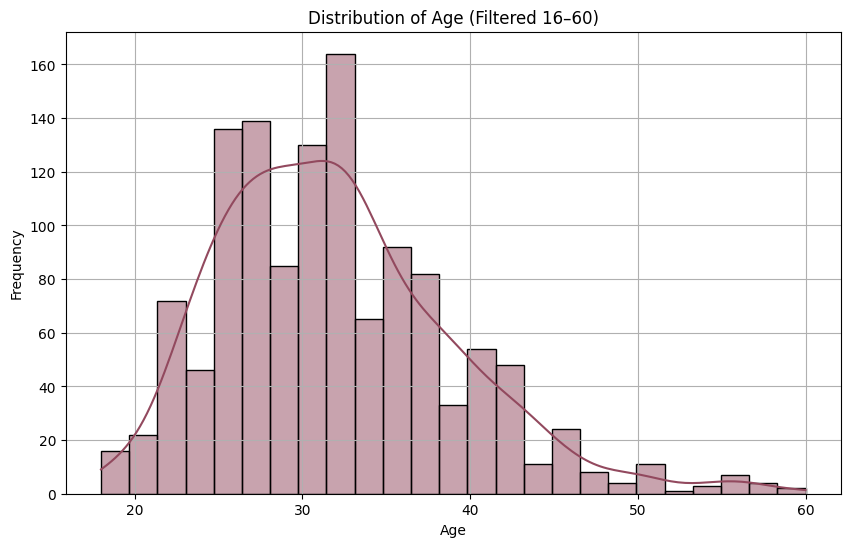

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age_clean'], kde=True, bins=25, color="#92495E")
plt.title("Distribution of Age (Filtered 16–60)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Age bucket counts:
Age
10s     16
20s    500
30s    554
40s    149
50s     26
60s      2
70+      0
Name: count, dtype: int64


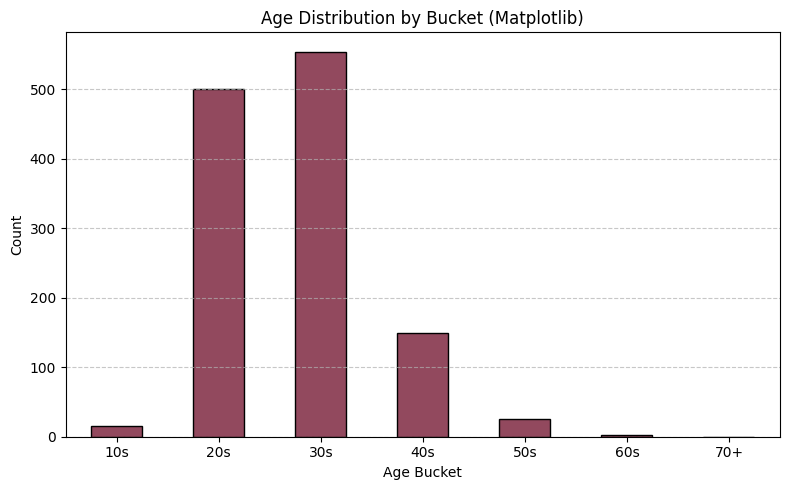

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


bins = [10, 19, 29, 39, 49, 59, 69, 120]
labels = ["10s", "20s", "30s", "40s", "50s", "60s", "70+"]


age_bucket = pd.cut(age_clean, bins=bins, labels=labels, include_lowest=True)


print("Age bucket counts:")
print(age_bucket.value_counts().sort_index())


plt.figure(figsize=(8, 5))
age_bucket.value_counts().sort_index().plot(
    kind='bar',
    color='#92495E',
    edgecolor='black'
)
plt.title('Age Distribution by Bucket (Matplotlib)')
plt.xlabel('Age Bucket')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




# **gender wise distribution**

(np.float64(-1.0999999459086374),
 np.float64(1.0999998980204502),
 np.float64(-1.099999738340389),
 np.float64(1.099996114644466))

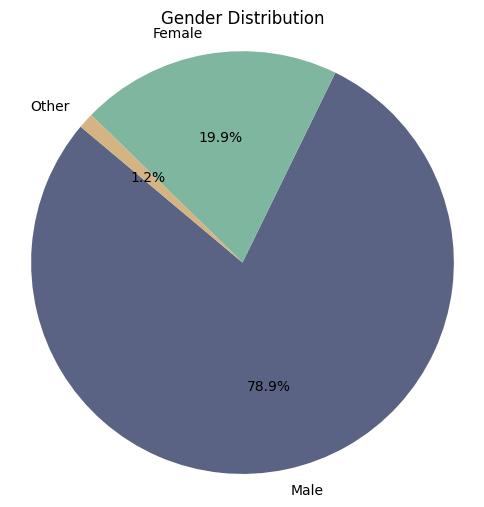

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['Gender_cleaned'] = df['Gender'].apply(map_gender)
gender_counts = df['Gender_cleaned'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=["#5A6383","#7FB69F","#D4B483"]
)
plt.title('Gender Distribution')
plt.axis('equal')


# **Country wise distribution**

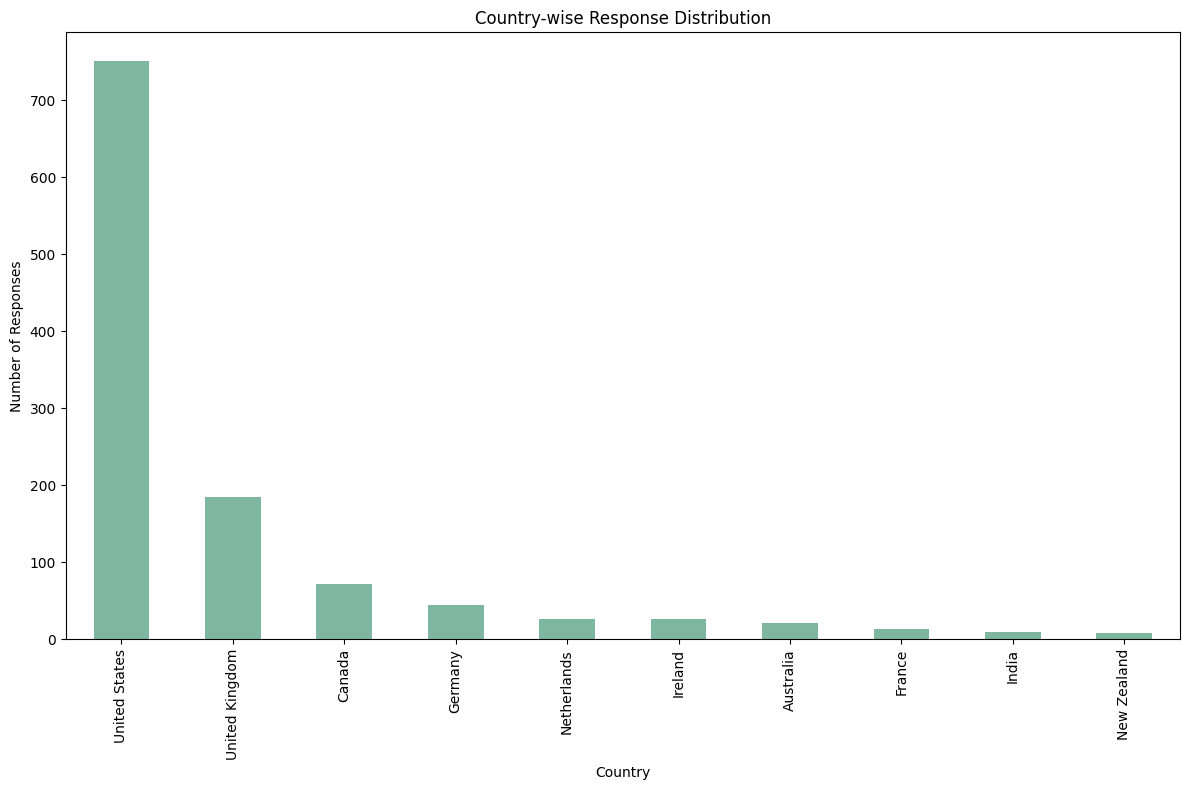

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count responses per country
country_counts = df['Country'].value_counts()

# Plot
plt.figure(figsize=(12, 8))
top_countries = country_counts.head(10)
top_countries.plot(kind='bar', color="#7FB69F")
plt.title('Country-wise Response Distribution')
plt.xlabel('Country')
plt.ylabel('Number of Responses')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



## **Distribution of Target Variable -** **Treatment**

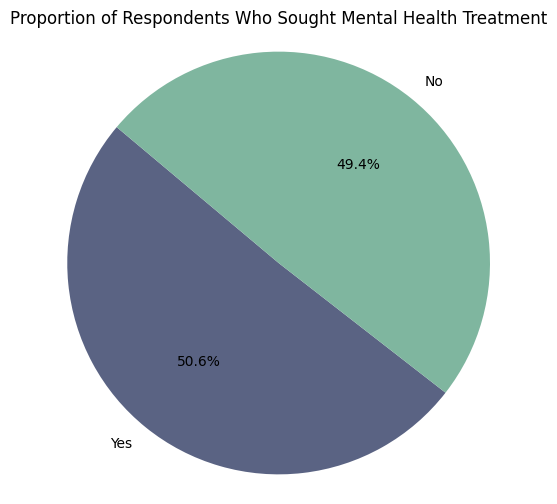

In [ ]:
treatment_counts = df['treatment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=["#5A6383","#7FB69F"])
plt.title("Proportion of Respondents Who Sought Mental Health Treatment")
plt.axis('equal')
plt.show()

# **Age Distribution by Treatment Status**

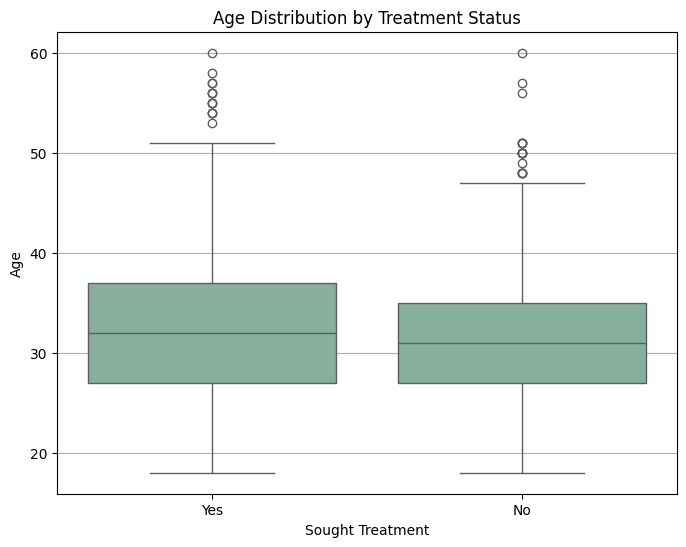

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='treatment', y='age_clean', color="#7FB69F")
plt.title("Age Distribution by Treatment Status")
plt.xlabel("Sought Treatment")
plt.ylabel("Age")
plt.grid(True, axis='y')
plt.show()


# **Treatment Rates by Remote Work Status**

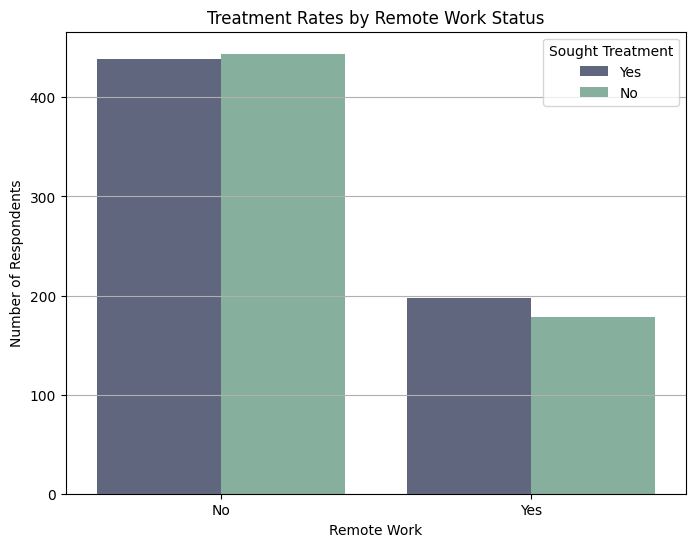

In [ ]:
colors = ["#5A6383", "#7FB69F"]

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='remote_work', hue='treatment', palette=colors)
plt.title("Treatment Rates by Remote Work Status")
plt.xlabel("Remote Work")
plt.ylabel("Number of Respondents")
plt.legend(title="Sought Treatment")
plt.grid(True, axis='y')
plt.show()

## Mathematical Formulations for Report

### Logistic Regression
The probability that an employee seeks treatment given features $x$ is:

$$
P(y=1 \mid x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n)}}
$$

where:  
- $y \in \{0,1\}$ = binary outcome (no treatment, treatment)  
- $\beta_0$ = intercept term  
- $\beta_i$ = model coefficients  
- $x_i$ = predictor variables  
- $e$ = Euler’s number  


### Random Forest
The final class prediction is the majority vote across all decision trees:

$$
\hat{y} = \text{mode}\{h_1(x), h_2(x), \dots, h_T(x)\}
$$

where:  
- $h_t(x)$ = prediction of the $t^{th}$ decision tree  
- $T$ = total number of trees in the forest  
- $\text{mode}\{\cdot\}$ = most frequent class prediction  


### Neural Network (Feed-forward MLP)
For one hidden layer, the output prediction is:

$$
\hat{y} = \sigma \left( W^{(2)} \, f\left(W^{(1)} x + b^{(1)}\right) + b^{(2)} \right)
$$

where:  
- $x$ = input features  
- $W^{(1)}, W^{(2)}$ = weight matrices  
- $b^{(1)}, b^{(2)}$ = biases  
- $f(\cdot)$ = activation function (ReLU in hidden layers)  
- $\sigma(\cdot)$ = sigmoid activation in output layer  
